Facial Keypoint Detection


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
import numpy as np 
import pandas as pd 
import os

from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline 

for dirname, _, filenames in os.walk('drive/My Drive/facial_keypoints_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

drive/My Drive/facial_keypoints_data/IdLookupTable.csv
drive/My Drive/facial_keypoints_data/SampleSubmission.csv
drive/My Drive/facial_keypoints_data/test/test.csv
drive/My Drive/facial_keypoints_data/training/training.csv


In [0]:
# test = pd.read_csv('drive/My Drive/facial_keypoints_data/test/test.csv')
# test.info()

In [0]:
training = pd.read_csv('drive/My Drive/facial_keypoints_data/training/training.csv')
# training.info()
# training[:,-1].head(2)

In [24]:
training.loc[:, training.columns != 'Image'].head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [27]:
training['Image'].head(3)

0    238 236 237 238 240 240 239 241 241 243 240 23...
1    219 215 204 196 204 211 212 200 180 168 178 19...
2    144 142 159 180 188 188 184 180 167 132 84 59 ...
Name: Image, dtype: object

Check how many NAs are in each column




In [28]:
training.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [0]:
# drop NA rows
training = training.dropna()
#training.fillna(method = 'ffill',inplace = True)

In [32]:
training.shape, type(training)

((2140, 31), pandas.core.frame.DataFrame)

In [0]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [0]:
def get_image_and_dots(df, index):
    image = plt.imshow(df['Image'][index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'ro'))
        
    return image, l

def plot_faces(plot_dim = 6):
  fig = plt.figure(figsize=(12, 12))
  fig.subplots_adjust(
      left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

  for i in range(plot_dim*plot_dim):
      ax = fig.add_subplot(plot_dim, plot_dim, i + 1, xticks=[], yticks=[])
      get_image_and_dots(training, i)

  plt.show()

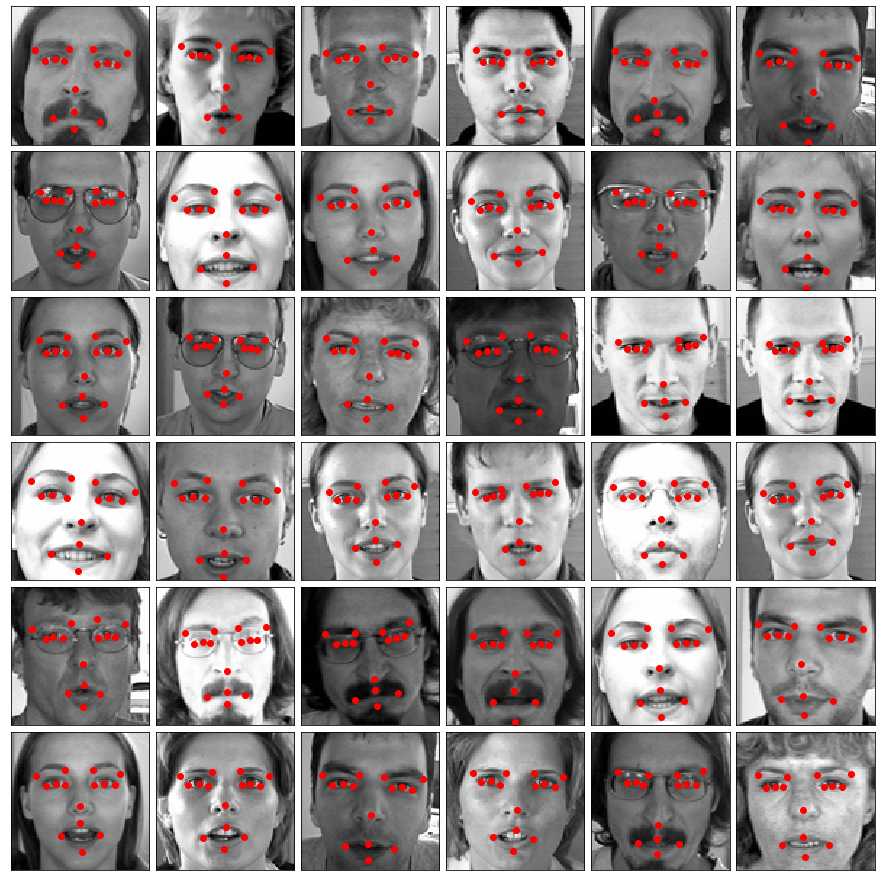

In [41]:
plot_faces(6)

Now we need to create X and Y matrixes. 

X's values are images (reshaped strings from datasource)

Y's are all features - 31 distinct features of human faces



In [0]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)
y = training.drop(['Image'], axis=1)

In [45]:
print(f"X's shape: {X.shape}")
print(f"y's shape: {y.shape}")
print(f"X type: {type(X)}, Y type: {type(y)}")
yn = y.to_numpy()
print(f"yn type: {type(yn)}, yn shape: {yn.shape}")

X's shape: (2140, 96, 96, 1)
y's shape: (2140, 30)
X type: <class 'numpy.ndarray'>, Y type: <class 'pandas.core.frame.DataFrame'>
yn type: <class 'numpy.ndarray'>, yn shape: (2140, 30)


# Train and test sets

Now we need to create train and test sets


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.15, random_state=666)

# **1st Model - Random Forest**

In [0]:
# random forest implementation

# **2nd Model - MLP**



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from sklearn.utils import shuffle

Preprocessing for MLP


In [0]:
training = pd.read_csv('drive/My Drive/facial_keypoints_data/training/training.csv')
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, sep=' '))
training = training.dropna()

# scale pixel values to [0, 1]
X = np.vstack(training['Image'].values) / 255.
X = X.astype(np.float32)

y = training[training.columns[:-1]].values
y = (y - 48) / 48  # scale target coordinates to [-1, 1]
X, y = shuffle(X, y, random_state=42)  # shuffle train data
y = y.astype(np.float32)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=666)

In [63]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(30))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1950      
Total params: 1,189,982
Trainable params: 1,189,982
Non-trainable params: 0
_________________________________________________________________


In [80]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])
hist = model.fit(X_train,
                 y_train,
                 nb_epoch=50,
                 batch_size=128,
                 validation_split=0.1,
                 verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 1637 samples, validate on 182 samples
Epoch 1/50
1637/1637 [==============================] - 0s 214us/step - loss: 0.0040 - acc: 0.6940 - val_loss: 0.0042 - val_acc: 0.6923
Epoch 2/50
1637/1637 [==============================] - 0s 51us/step - loss: 0.0041 - acc: 0.6891 - val_loss: 0.0042 - val_acc: 0.6923
Epoch 3/50
1637/1637 [==============================] - 0s 50us/step - loss: 0.0041 - acc: 0.6891 - val_loss: 0.0042 - val_acc: 0.6868
Epoch 4/50
1637/1637 [==============================] - 0s 52us/step - loss: 0.0041 - acc: 0.6976 - val_loss: 0.0042 - val_acc: 0.6923
Epoch 5/50
1637/1637 [==============================] - 0s 50us/step - loss: 0.0040 - acc: 0.6885 - val_loss: 0.0042 - val_acc: 0.6923
Epoch 6/50
1637/1637 [==============================] - 0s 54us/step - loss: 0.0040 - acc: 0.6940 - val_loss: 0.0042 - val_acc: 0.6868
Epoch 7/50
1637/1637 [==============================] - 0s 55us/step - loss: 0.0040 - acc: 0.6927 - val_loss: 0.0042 - val_acc: 0.6923
Epoch 8

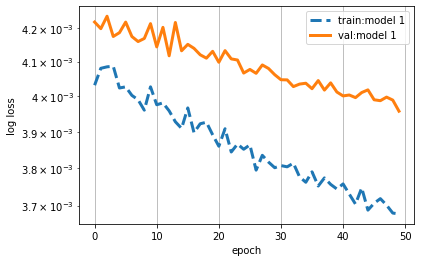

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(hist,name,plt,RMSE_TF=False):
    '''
    RMSE_TF: if True, then RMSE is plotted with original scale 
    '''
    loss = hist['loss']
    val_loss = hist['val_loss']
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48 
        val_loss = np.sqrt(np.array(val_loss))*48 
        
    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)

plot_loss(hist.history,"model 1",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

In [82]:
score, acc = model.evaluate(X_test, y_test, batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

321/321 [==============================] - 0s 55us/step
Test score: 0.0037445123517752346
Test accuracy: 0.7352024955541545


# **3rd Model - CNN**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Convolution2D,LeakyReLU, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [0]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________

In [15]:
model.compile(optimizer='Adam', 
              loss='mse', 
              metrics=['mae'])

NameError: ignored

In [0]:
model.fit(X_train, y_train, epochs=500)

Train on 1498 samples
Epoch 1/500
1498/1498 [==============================] - 8s 6ms/sample - loss: 179.9367 - mean_absolute_error: 8.0983
Epoch 2/500
1498/1498 [==============================] - 1s 911us/sample - loss: 25.0378 - mean_absolute_error: 3.9335
Epoch 3/500
1498/1498 [==============================] - 1s 892us/sample - loss: 21.7562 - mean_absolute_error: 3.6588
Epoch 4/500
1498/1498 [==============================] - 1s 895us/sample - loss: 18.0761 - mean_absolute_error: 3.3251
Epoch 5/500
1498/1498 [==============================] - 1s 916us/sample - loss: 17.6085 - mean_absolute_error: 3.2948
Epoch 6/500
1498/1498 [==============================] - 1s 907us/sample - loss: 14.0589 - mean_absolute_error: 2.9472
Epoch 7/500
1498/1498 [==============================] - 1s 910us/sample - loss: 15.2097 - mean_absolute_error: 3.0582
Epoch 8/500
1498/1498 [==============================] - 1s 898us/sample - loss: 12.6610 - mean_absolute_error: 2.7808
Epoch 9/500
1498/1498 [====

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.994534070618056
Test accuracy: 1.3397825


In [0]:
model.save('keypoint_model22.h5')

In [0]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [0]:
test.shape, type(test)

((1783, 2), pandas.core.frame.DataFrame)

In [0]:
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)
test_res = model.predict(test_X)

In [0]:
train_predicts = model.predict(X_train)

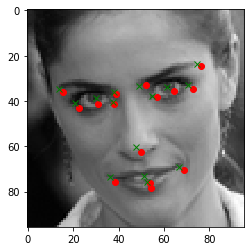

In [0]:
n = 46

xv = X_train[n].reshape((96,96))
plt.imshow(xv,cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[n][i-1], train_predicts[n][i], 'ro')
    plt.plot(y_train[n][i-1], y_train[n][i], 'x', color='green')

plt.show()